In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!cp output2.csv drive/MyDrive/
!cp drive/MyDrive/Science\ Fair/output2.csv /content/

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output2.csv",
    names=["Time", "Open"])

X_btc = btc_data["Time"]
y_btc = btc_data["Open"]

btc_data

,Time,Open
0,1449341520,377.48
1,1449341580,377.50
2,1449341640,377.50
3,1449341760,377.50
4,1449341820,377.50
...,...,...
2526116,1617148560,58714.31
2526117,1617148620,58683.97
2526118,1617148680,58693.43
2526119,1617148740,58742.18


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_btc, y_btc, test_size=0.2, random_state=62)

'''
btc_features = btc_train.copy()
btc_labels = btc_features.pop('Time')

btc_features = np.array(btc_features)
btc_features
btc_features = np.asarray(btc_features).astype('float32')
'''

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

btc_model = tf.keras.Sequential([
  layers.Dense(100),
  layers.Dense(100),
  layers.Dense(100),
  layers.Dense(100),
  layers.Dense(100),
  layers.Dense(100),
  layers.Dense(1)
])

btc_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

history = btc_model.fit(X_train, y_train, epochs=10, callbacks=[callback])

btc_model.evaluate(X_test)

Epoch 1/10
63153/63153 [==============================] - 185s 3ms/step - loss: 61821729898496.0000
Epoch 2/10
63153/63153 [==============================] - 185s 3ms/step - loss: 2783386271744.0000
Epoch 3/10
63153/63153 [==============================] - 186s 3ms/step - loss: 65622048768.0000
Epoch 4/10
63153/63153 [==============================] - 186s 3ms/step - loss: 16494767104.0000
Epoch 5/10
63153/63153 [==============================] - 187s 3ms/step - loss: 42868760576.0000
Epoch 6/10
63153/63153 [==============================] - 185s 3ms/step - loss: 16043920384.0000
Epoch 7/10
63153/63153 [==============================] - 187s 3ms/step - loss: 9680391168.0000
Epoch 8/10
63153/63153 [==============================] - 181s 3ms/step - loss: 27245164544.0000
Epoch 9/10
63153/63153 [==============================] - 182s 3ms/step - loss: 13152037888.0000
Epoch 10/10
15789/15789 [==============================] - 29s 2ms/step - loss: 0.0000e+00


In [ ]:
len(X_train), len(X_test)

(2020896, 505225)

In [ ]:
# save and model ANN
from tensorflow.keras.utils import plot_model

len(X_btc), len(X_train), len(X_test)

print(plot_model(model=btc_model, show_shapes=True))

btc_model.save("first_model")
btc_model.save("first_model.h5")

X_test, y_pred

<IPython.core.display.Image object>
INFO:tensorflow:Assets written to: first_model/assets


(1428212    1550124960
 426399     1486596540
 2197330    1597275900
 268811     1472328000
 1054341    1526153820
               ...    
 2417652    1610632560
 237428     1469204640
 74914      1455229860
 995588     1522623300
 90761      1456473240
 Name: Time, Length: 505225, dtype: int64, 0.0)

In [ ]:
y_pred = btc_model.predict(X_test)

(505225,)
(505225, 1)


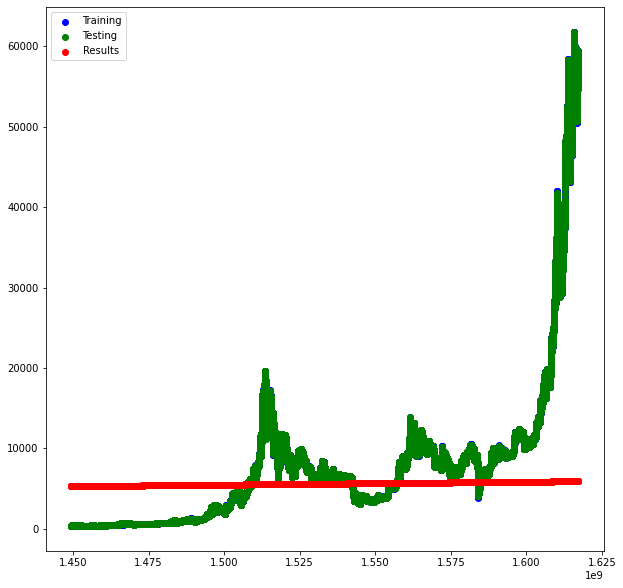

In [ ]:
# plot model
def plot_evaluations(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  print(test_data.shape)
  print(predictions.shape)

  plt.figure(figsize=(10, 10))
  plt.scatter(train_data, train_labels, c='b', label="Training")
  plt.scatter(test_data, test_labels, c='g', label="Testing")
  plt.scatter(test_data, predictions, c='r', label="Results")
  plt.legend()

plot_evaluations()

Text(0.5, 0, 'epochs')

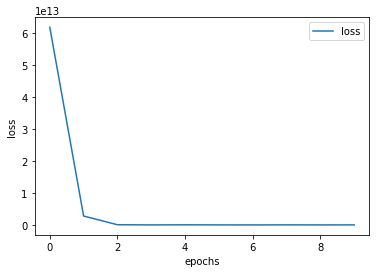

In [ ]:
# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#!mkdir drive/MyDrive/Science\ Fair

In [ ]:
#!cp first_model.h5 drive/MyDrive/Science\ Fair

In [ ]:
!ls drive/MyDrive/Science\ Fair/
#!mv drive/MyDrive/Science\ Fair/first_model.h5 /
#!cp first_model.h5 drive/MyDrive/Science\ Fair/
#!cp first_model.h5 drive/MyDrive/Science\ Fair/first_model.h5
!cp drive/MyDrive/Science\ Fair/first_model.h5 /content/

ls: cannot access 'drive/MyDrive/Science Fair/': No such file or directory
cp: cannot stat 'drive/MyDrive/Science Fair/first_model.h5': No such file or directory


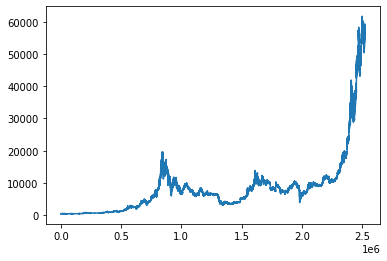

In [ ]:
y_btc.plot()

In [ ]:
# preprocessing
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output2.csv",
    names=["Time", "Open"])

ct = make_column_transformer(
    (MinMaxScaler(), ["Time"])
)

X_btc = btc_data[["Time"]]
y_btc = btc_data["Open"]

X_train, X_test, y_train, y_test = train_test_split(X_btc, y_btc, test_size=0.2, random_state=62)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

btc_model_2 = tf.keras.Sequential([
  layers.Dense(100, activation='sigmoid'),
  layers.Dense(100, activation='sigmoid'),
  layers.Dense(100, activation='sigmoid'),
  layers.Dense(100, activation='sigmoid'),
  layers.Dense(100, activation='sigmoid'),
  layers.Dense(100, activation='sigmoid'),
  layers.Dense(1)
])

btc_model_2.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

history = btc_model_2.fit(X_train_normal, y_train, batch_size=8192, epochs=10, callbacks=[callback])

btc_model_2.evaluate(X_test_normal, y_test, batch_size=8192)

Epoch 1/10
247/247 [==============================] - 3s 11ms/step - loss: 167005312.0000
Epoch 2/10
247/247 [==============================] - 2s 10ms/step - loss: 166773280.0000
Epoch 3/10
247/247 [==============================] - 2s 10ms/step - loss: 166546592.0000
Epoch 4/10
247/247 [==============================] - 2s 9ms/step - loss: 166321376.0000
Epoch 5/10
247/247 [==============================] - 2s 9ms/step - loss: 166086160.0000
Epoch 6/10
247/247 [==============================] - 2s 9ms/step - loss: 165850704.0000
Epoch 7/10
247/247 [==============================] - 2s 9ms/step - loss: 165614736.0000
Epoch 8/10
247/247 [==============================] - 2s 9ms/step - loss: 165380496.0000
Epoch 9/10
247/247 [==============================] - 2s 9ms/step - loss: 165140304.0000
Epoch 10/10
62/62 [==============================] - 0s 5ms/step - loss: 165547472.0000


165547472.0

In [ ]:
y_pred = btc_model_2.predict(X_test_normal)

btc_model_2.save("btc_model_2")
btc_model_2.save("btc_model_2.h5")

INFO:tensorflow:Assets written to: btc_model_2/assets


(505225, 1)
(505225, 1)


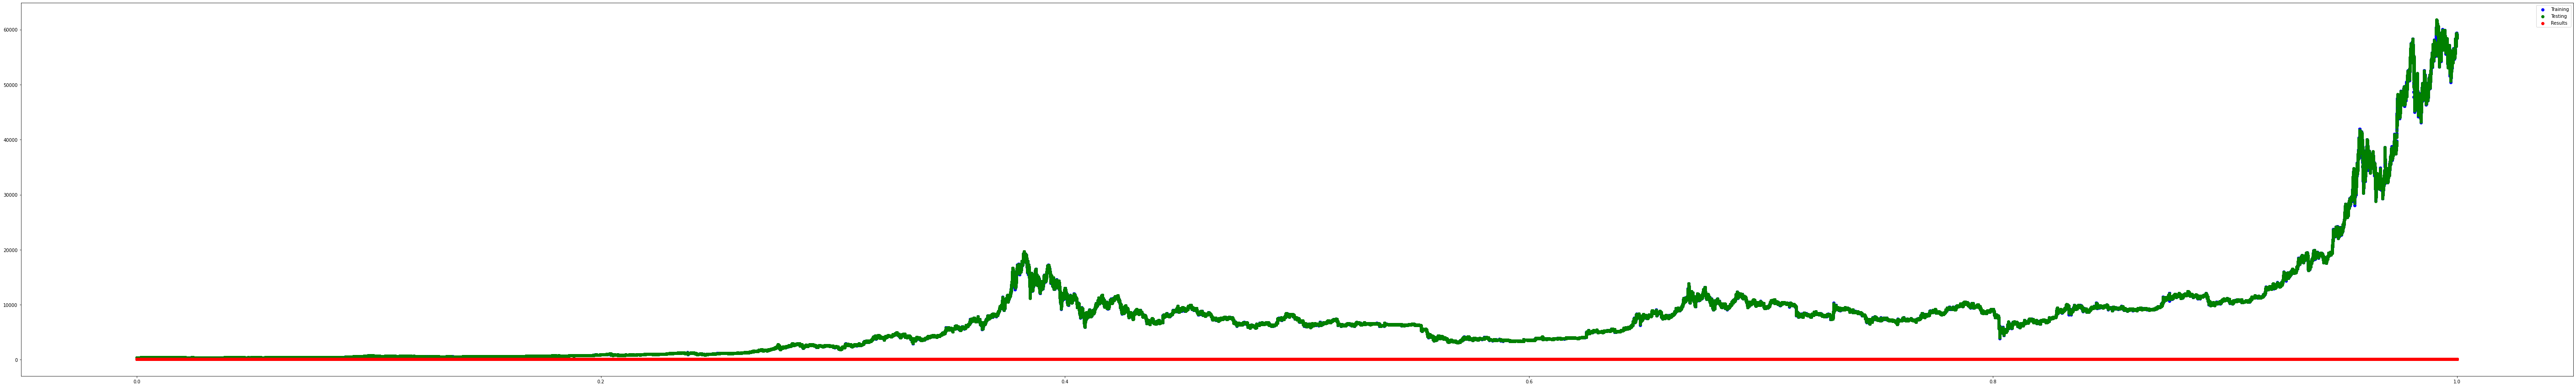

In [ ]:
# plot model
def plot_evaluations(train_data=X_train_normal,
                     train_labels=y_train,
                     test_data=X_test_normal,
                     test_labels=y_test,
                     predictions=y_pred):
  print(test_data.shape)
  print(predictions.shape)

  plt.figure(figsize=(100, 15))
  plt.scatter(train_data, train_labels, c='b', label="Training")
  plt.scatter(test_data, test_labels, c='g', label="Testing")
  plt.scatter(test_data, predictions, c='r', label="Results")
  plt.legend()

plot_evaluations()

Text(0.5, 0, 'epochs')

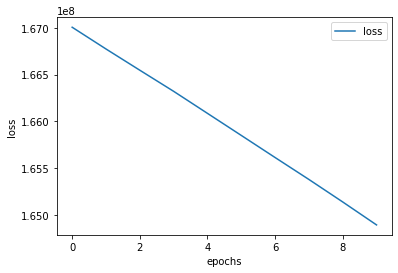

In [ ]:
# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epoch 1/100
247/247 [==============================] - 5s 11ms/step - loss: 92220752.0000
Epoch 2/100
247/247 [==============================] - 2s 10ms/step - loss: 45216348.0000
Epoch 3/100
247/247 [==============================] - 2s 10ms/step - loss: 3227958.0000
Epoch 4/100
247/247 [==============================] - 2s 10ms/step - loss: 1741744.6250
Epoch 5/100
247/247 [==============================] - 2s 9ms/step - loss: 1592424.0000
Epoch 6/100
247/247 [==============================] - 2s 10ms/step - loss: 1565320.1250
Epoch 7/100
247/247 [==============================] - 2s 10ms/step - loss: 1541217.2500
Epoch 8/100
247/247 [==============================] - 2s 9ms/step - loss: 1542981.7500
Epoch 9/100
247/247 [==============================] - 2s 9ms/step - loss: 1539195.0000
Epoch 10/100
247/247 [==============================] - 2s 9ms/step - loss: 1529224.7500
Epoch 11/100
247/247 [==============================] - 2s 10ms/step - loss: 1530001.8750
Epoch 12/100
247/247 

Text(0.5, 0, 'epochs')

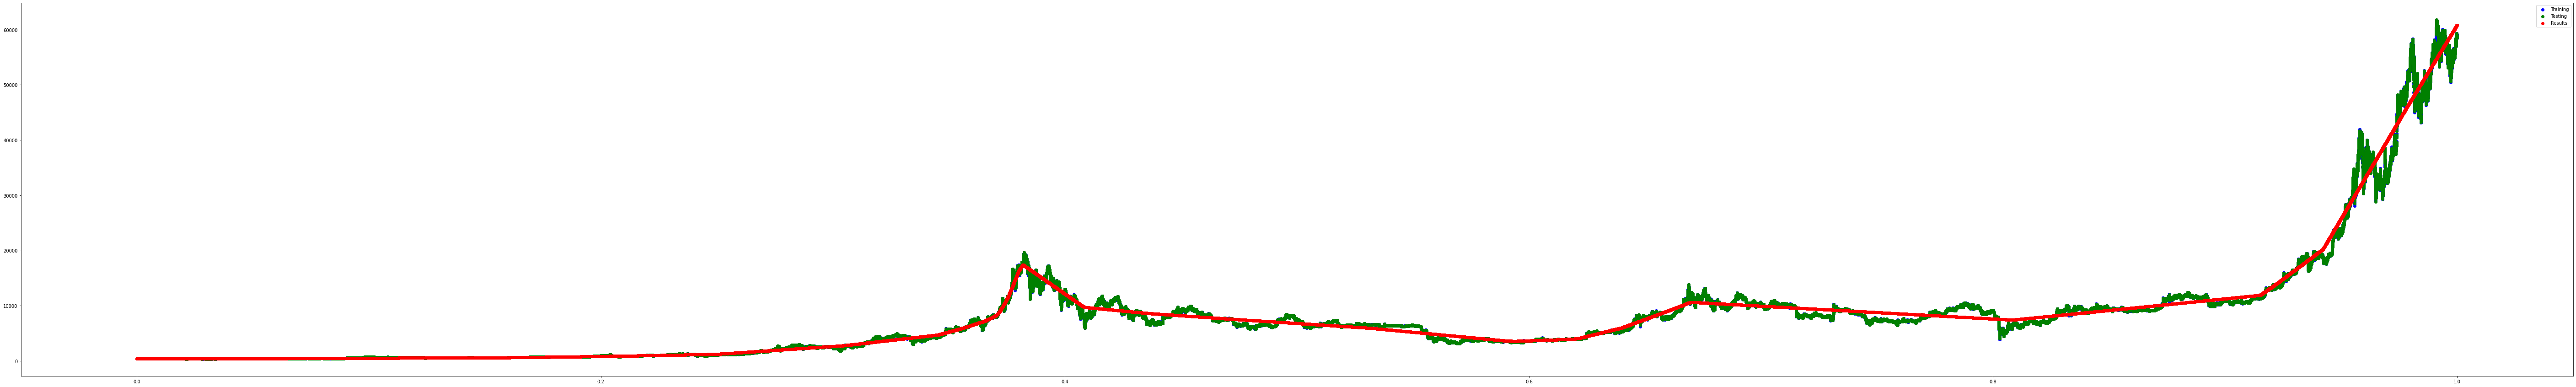

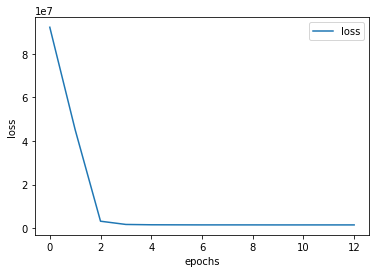

In [ ]:
# next model
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output2.csv",
    names=["Time", "Open"])

ct = make_column_transformer(
    (MinMaxScaler(), ["Time"])
)

X_btc = btc_data[["Time"]]
y_btc = btc_data["Open"]

X_train, X_test, y_train, y_test = train_test_split(X_btc, y_btc, test_size=0.2, random_state=62)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

btc_model_3 = tf.keras.Sequential([
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(1)
])

btc_model_3.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

history = btc_model_3.fit(X_train_normal, y_train, batch_size=8192, epochs=100, callbacks=[callback])

btc_model_3.evaluate(X_test_normal, y_test, batch_size=8192)

y_pred = btc_model_3.predict(X_test_normal)

btc_model_3.save("btc_model_3")
btc_model_3.save("btc_model_3.h5")

# plot model
def plot_evaluations(train_data=X_train_normal,
                     train_labels=y_train,
                     test_data=X_test_normal,
                     test_labels=y_test,
                     predictions=y_pred):
  print(test_data.shape)
  print(predictions.shape)

  plt.figure(figsize=(100, 15))
  plt.scatter(train_data, train_labels, c='b', label="Training")
  plt.scatter(test_data, test_labels, c='g', label="Testing")
  plt.scatter(test_data, predictions, c='r', label="Results")
  plt.legend()

plot_evaluations()

# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#!pip install keras

Epoch 1/100
247/247 [==============================] - 5s 10ms/step - loss: 90268280.0000
Epoch 2/100
247/247 [==============================] - 2s 10ms/step - loss: 37129548.0000
Epoch 3/100
247/247 [==============================] - 2s 10ms/step - loss: 2122981.0000
Epoch 4/100
247/247 [==============================] - 2s 10ms/step - loss: 1784968.8750
Epoch 5/100
247/247 [==============================] - 2s 10ms/step - loss: 1646577.2500
Epoch 6/100
247/247 [==============================] - 2s 10ms/step - loss: 1589663.0000
Epoch 7/100
247/247 [==============================] - 2s 10ms/step - loss: 1564746.3750
Epoch 8/100
247/247 [==============================] - 2s 9ms/step - loss: 1536197.1250
Epoch 9/100
247/247 [==============================] - 2s 9ms/step - loss: 1520233.3750
Epoch 10/100
247/247 [==============================] - 2s 9ms/step - loss: 1522214.0000
Epoch 11/100
247/247 [==============================] - 2s 9ms/step - loss: 1522044.6250
Epoch 12/100
247/247 

Text(0.5, 0, 'epochs')

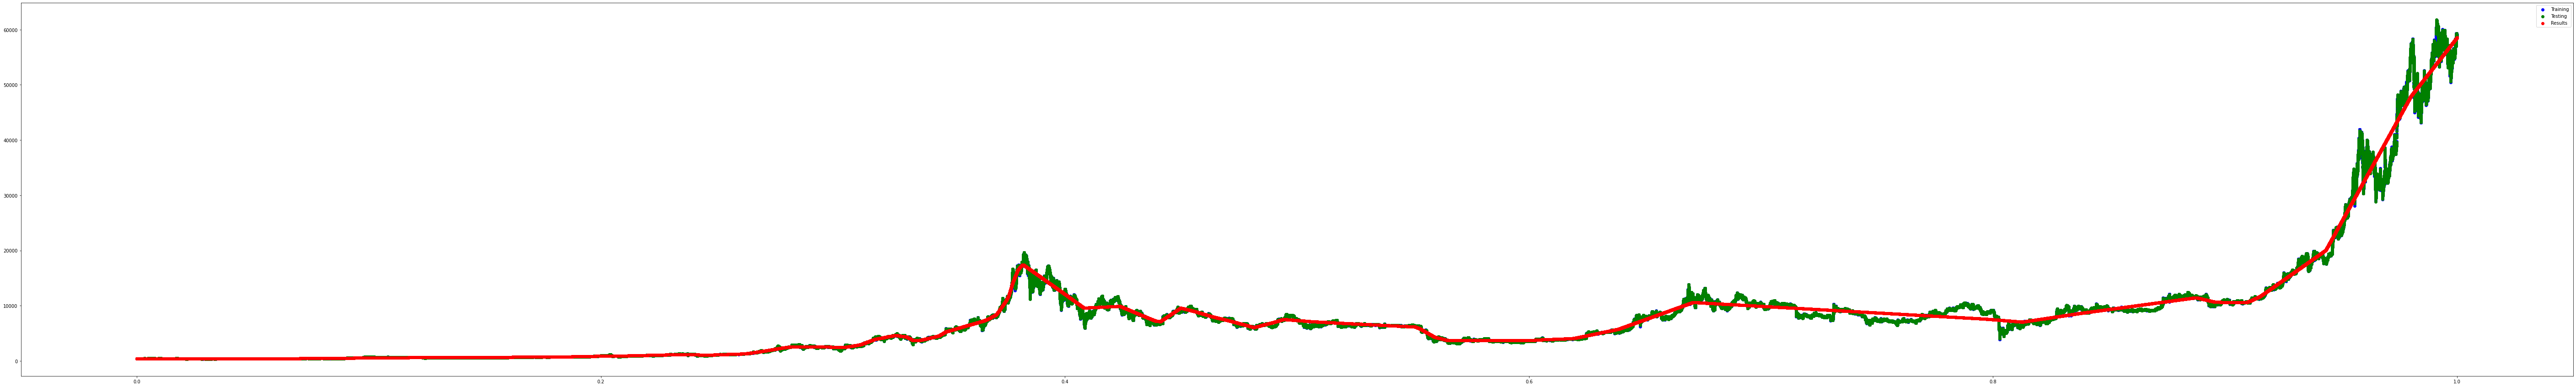

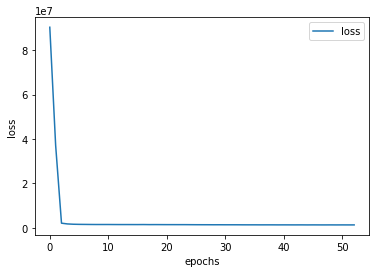

In [ ]:
# model 4
# next model
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output.csv",
    names=["Time", "Open"])

X_btc = btc_data[["Time"]]
y_btc = btc_data["Open"]

X_train, X_test, y_train, y_test = train_test_split(X_btc, y_btc, test_size=0.2, random_state=62)

ct = make_column_transformer(
    (MinMaxScaler(), ["Time"])
)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

btc_model_4 = tf.keras.Sequential([
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(1, activation="linear")
])

btc_model_4.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

history = btc_model_4.fit(X_train_normal, y_train, batch_size=8192, epochs=100, callbacks=[callback])

btc_model_4.evaluate(X_test_normal, y_test, batch_size=8192)

y_pred = btc_model_4.predict(X_test_normal)

btc_model_4.save("btc_model_4")
btc_model_4.save("btc_model_4.h5")

# plot model
def plot_evaluations(train_data=X_train_normal,
                     train_labels=y_train,
                     test_data=X_test_normal,
                     test_labels=y_test,
                     predictions=y_pred):
  print(test_data.shape)
  print(predictions.shape)

  plt.figure(figsize=(100, 15))
  plt.scatter(train_data, train_labels, c='b', label="Training")
  plt.scatter(test_data, test_labels, c='g', label="Testing")
  plt.scatter(test_data, predictions, c='r', label="Results")
  plt.legend()

plot_evaluations()

# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epoch 1/100
293/293 [==============================] - 4s 10ms/step - loss: 22010898.0000
Epoch 2/100
293/293 [==============================] - 3s 10ms/step - loss: 9573577.0000
Epoch 3/100
293/293 [==============================] - 3s 9ms/step - loss: 9571018.0000
Epoch 4/100
293/293 [==============================] - 3s 9ms/step - loss: 9571645.0000
Epoch 5/100
293/293 [==============================] - 3s 9ms/step - loss: 9571322.0000
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 1136023680.0000
INFO:tensorflow:Assets written to: btc_model_5/assets
(126307, 1)
(126307, 1)


Text(0.5, 0, 'epochs')

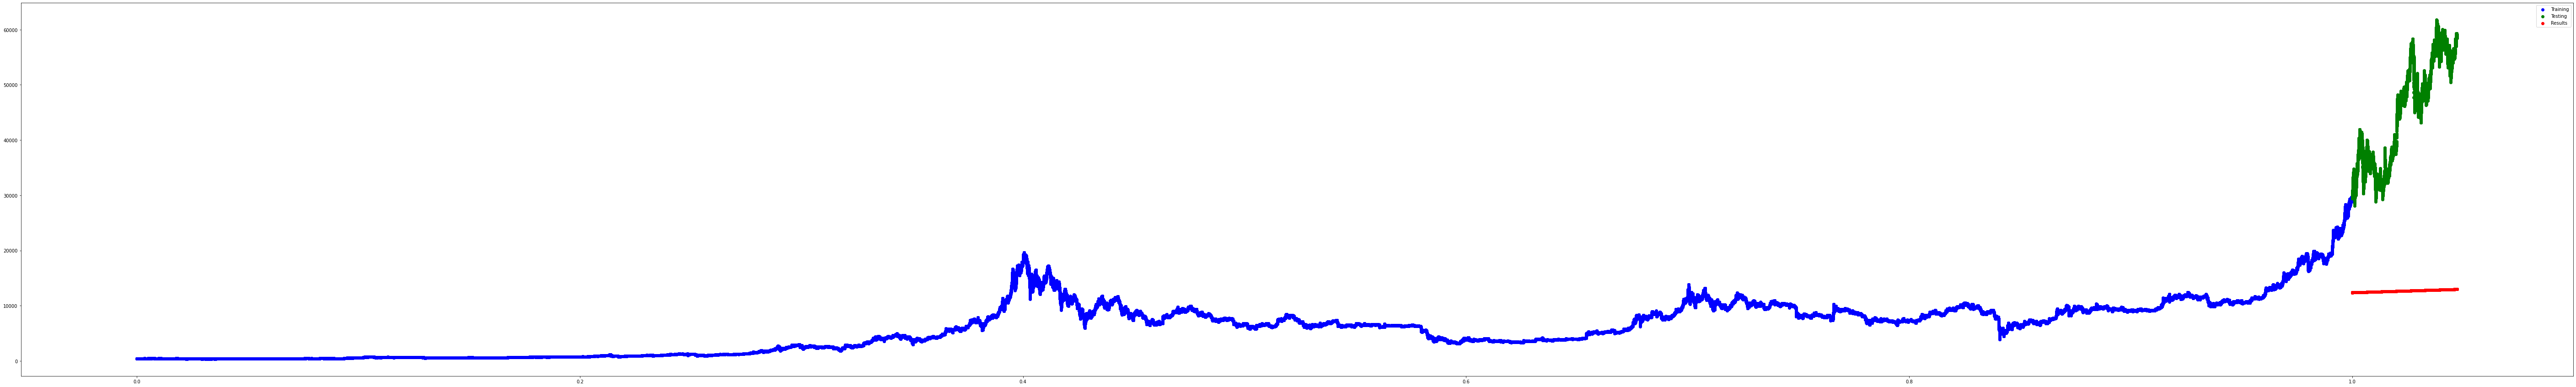

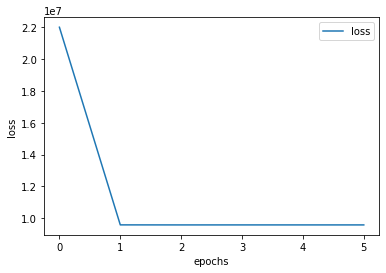

In [ ]:
# model 5
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output.csv",
    names=["Time", "Open"])

X_btc = btc_data[["Time"]]
y_btc = btc_data["Open"]

split_size = int(0.95 * len(y_btc))

X_train, y_train = X_btc[:split_size], y_btc[:split_size]
X_test, y_test = X_btc[split_size:], y_btc[split_size:]

#X_train, X_test, y_train, y_test = train_test_split(X_btc, y_btc, test_size=0.2, random_state=62)

ct = make_column_transformer(
    (MinMaxScaler(), ["Time"])
)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

btc_model_5 = tf.keras.Sequential([
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(1, activation="linear")
])

btc_model_5.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

history = btc_model_5.fit(X_train_normal, y_train, batch_size=8192, epochs=100, callbacks=[callback])

btc_model_5.evaluate(X_test_normal, y_test, batch_size=8192)

y_pred = btc_model_5.predict(X_test_normal)

btc_model_5.save("btc_model_5")
btc_model_5.save("btc_model_5.h5")

# plot model
def plot_evaluations(train_data=X_train_normal,
                     train_labels=y_train,
                     test_data=X_test_normal,
                     test_labels=y_test,
                     predictions=y_pred):
  print(test_data.shape)
  print(predictions.shape)

  plt.figure(figsize=(100, 15))
  plt.scatter(train_data, train_labels, c='b', label="Training")
  plt.scatter(test_data, test_labels, c='g', label="Testing")
  plt.scatter(test_data, predictions, c='r', label="Results")
  plt.legend()

plot_evaluations()

# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epoch 1/100
165/165 [==============================] - 5s 23ms/step - loss: 281.8619 - mae: 281.8619 - val_loss: 404.8664 - val_mae: 404.8664
Epoch 2/100
165/165 [==============================] - 4s 23ms/step - loss: 84.1266 - mae: 84.1266 - val_loss: 229.7147 - val_mae: 229.7147
Epoch 3/100
165/165 [==============================] - 2s 14ms/step - loss: 80.3048 - mae: 80.3048 - val_loss: 238.0103 - val_mae: 238.0103
Epoch 4/100
165/165 [==============================] - 2s 14ms/step - loss: 75.3191 - mae: 75.3191 - val_loss: 324.4901 - val_mae: 324.4901
Epoch 5/100
165/165 [==============================] - 2s 13ms/step - loss: 72.5116 - mae: 72.5116 - val_loss: 310.8580 - val_mae: 310.8580
Epoch 6/100
165/165 [==============================] - 2s 14ms/step - loss: 70.4985 - mae: 70.4985 - val_loss: 233.5326 - val_mae: 233.5326
Epoch 7/100
165/165 [==============================] - 2s 14ms/step - loss: 68.1651 - mae: 68.1651 - val_loss: 251.5542 - val_mae: 251.5542
Epoch 8/100
165/16

Text(0.5, 0, 'epochs')

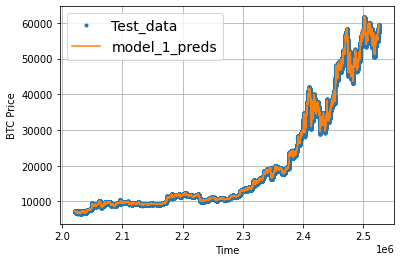

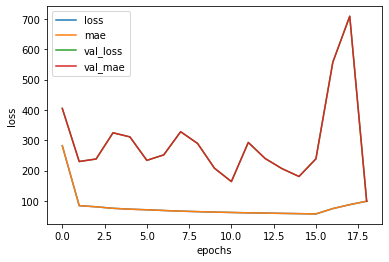

In [ ]:
# model 6
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import os

HORIZON = 1
WINDOW_SIZE = 30

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output.csv",
    names=["Time", "Open"])

X_btc = btc_data[["Time"]]
y_btc = btc_data["Open"]

timesteps = btc_data.index.to_numpy()
prices = btc_data["Open"].to_numpy()

split_size = int(0.8 * len(prices))
# Create train data splits (everything before the split)
X_train_a, y_train_a = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test_a, y_test_a = timesteps[split_size:], prices[split_size:]

def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, 
                                            save_best_only=True)

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

'''
split_size = int(0.95 * len(y_btc))

X_train, y_train = X_btc[:split_size], y_btc[:split_size]
X_test, y_test = X_btc[split_size:], y_btc[split_size:]

X_train, X_test, y_train, y_test = train_test_split(X_btc, y_btc, test_size=0.2, random_state=62)

ct = make_column_transformer(
    (MinMaxScaler(), ["Time"])
)

X_train = pd.DataFrame(X_train)

print(X_train.head())

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
'''

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

btc_model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_6")

btc_model_6.compile(loss = "mae",
                    optimizer = tf.optimizers.Adam(),
                    metrics=["mae"])

history = btc_model_6.fit(x=X_train, y=y_train, 
                          batch_size=12288, 
                          validation_data=(X_test, y_test),
                          epochs=100, 
                          callbacks=[early_stopping, create_model_checkpoint(model_name=btc_model_6.name)])

btc_model_6.evaluate(X_test, y_test, batch_size=8192)

y_pred = btc_model_6.predict(X_test)

btc_model_6.save("btc_model_6")
btc_model_6.save("btc_model_6.h5")

'''
# plot model
def plot_evaluations(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  print(train_data.shape)
  print(train_labels.shape)
  print(test_data.shape)
  print(predictions.shape)

  plt.figure(figsize=(100, 15))
  plt.scatter(train_data, train_labels, c='b', label="Training")
  plt.scatter(test_data, test_labels, c='g', label="Testing")
  plt.scatter(test_data, predictions, c='r', label="Results")
  plt.legend()

plot_evaluations()
'''

offset=0
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_1_preds")

# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

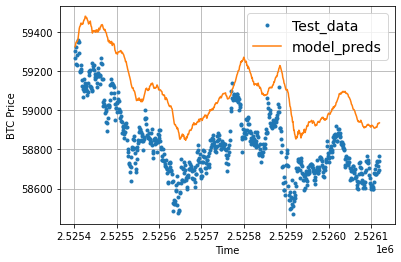

In [ ]:
offset=504500
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_preds")

In [ ]:
# install ibm watson for tone detection
!pip install --upgrade "ibm-watson>=5.3.0"

     |████████████████████████████████| 412 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 62 kB 775 kB/s 
     |████████████████████████████████| 138 kB 44.0 MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-5.3.0-py3-none-any.whl size=408872 sha256=d2964041c4ec264c45a61aa16239021702c71d31fa185702a6a5269361759419
  Stored in directory: /root/.cache/pip/wheels/21/d9/82/4ce5b94730bc4f1f7b4c6384f72964b9b8f79fcc125bb8085c
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.13.2-py3-none-any.whl size=83241 sha256=6fdf739644229c6a3540e915d78ba7c3caef780182aece6155004a5ab1ccd42d
  Stored in directory: /root/.cache/pip/wheels/f0/0d/5c/0c26fcc2db712e8d270e52f7c9f6d8abe33ca79ec29438aa14
Successfully built ibm-watson ibm-cloud-sdk

Epoch 1/100
165/165 [==============================] - 4s 22ms/step - loss: 249.0437 - mae: 249.0437 - val_loss: 442.7596 - val_mae: 442.7596
Epoch 2/100
165/165 [==============================] - 2s 14ms/step - loss: 112.5631 - mae: 112.5631 - val_loss: 602.9102 - val_mae: 602.9102
Epoch 3/100
165/165 [==============================] - 3s 21ms/step - loss: 69.5393 - mae: 69.5393 - val_loss: 346.7865 - val_mae: 346.7865
Epoch 4/100
165/165 [==============================] - 3s 21ms/step - loss: 66.1912 - mae: 66.1912 - val_loss: 315.3014 - val_mae: 315.3014
Epoch 5/100
165/165 [==============================] - 4s 23ms/step - loss: 63.8254 - mae: 63.8254 - val_loss: 151.4567 - val_mae: 151.4567
Epoch 6/100
165/165 [==============================] - 4s 22ms/step - loss: 61.7317 - mae: 61.7317 - val_loss: 114.6157 - val_mae: 114.6157
Epoch 7/100
165/165 [==============================] - 2s 13ms/step - loss: 59.5237 - mae: 59.5237 - val_loss: 327.9041 - val_mae: 327.9041
Epoch 8/100
165/

Text(0.5, 0, 'epochs')

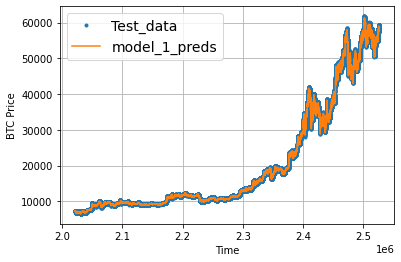

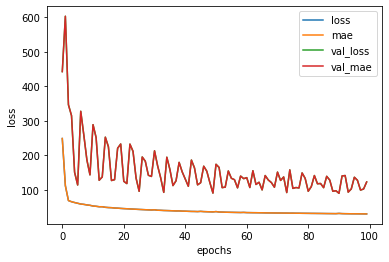

In [ ]:
# model 7
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import os

HORIZON = 1
WINDOW_SIZE = 7

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output.csv",
    names=["Time", "Open"])

X_btc = btc_data[["Time"]]
y_btc = btc_data["Open"]

timesteps = btc_data.index.to_numpy()
prices = btc_data["Open"].to_numpy()

split_size = int(0.8 * len(prices))
# Create train data splits (everything before the split)
X_train_a, y_train_a = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test_a, y_test_a = timesteps[split_size:], prices[split_size:]

def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, 
                                            save_best_only=True)

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

btc_model_7 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_7")

btc_model_7.compile(loss = "mae",
                    optimizer = tf.optimizers.Adam(),
                    metrics=["mae"])

history = btc_model_7.fit(x=X_train, y=y_train, 
                          batch_size=12288, 
                          validation_data=(X_test, y_test),
                          epochs=100, 
                          callbacks=[early_stopping, create_model_checkpoint(model_name=btc_model_7.name)])

btc_model_7.evaluate(X_test, y_test, batch_size=8192)

y_pred = btc_model_7.predict(X_test)

btc_model_7.save("btc_model_7")
btc_model_7.save("btc_model_7.h5")

offset=0
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_1_preds")

# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

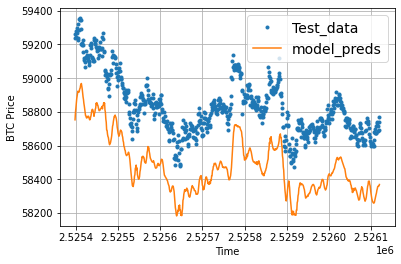

In [ ]:
offset=504500
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_preds")

Epoch 1/100
165/165 [==============================] - 5s 28ms/step - loss: 378.2181 - mae: 378.2181 - val_loss: 113.1422 - val_mae: 113.1422
Epoch 2/100
165/165 [==============================] - 3s 16ms/step - loss: 154.6447 - mae: 154.6447 - val_loss: 171.5124 - val_mae: 171.5124
Epoch 3/100
165/165 [==============================] - 3s 16ms/step - loss: 151.1990 - mae: 151.1990 - val_loss: 211.3707 - val_mae: 211.3707
Epoch 4/100
165/165 [==============================] - 3s 16ms/step - loss: 83.4952 - mae: 83.4952 - val_loss: 242.4266 - val_mae: 242.4266
Epoch 5/100
165/165 [==============================] - 3s 17ms/step - loss: 85.2838 - mae: 85.2838 - val_loss: 367.7196 - val_mae: 367.7196
Epoch 6/100
165/165 [==============================] - 3s 16ms/step - loss: 83.8032 - mae: 83.8032 - val_loss: 508.2816 - val_mae: 508.2816
Epoch 7/100
165/165 [==============================] - 3s 16ms/step - loss: 81.2133 - mae: 81.2133 - val_loss: 272.6377 - val_mae: 272.6377
Epoch 8/100
16

Text(0.5, 0, 'epochs')

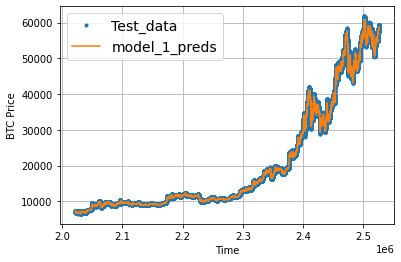

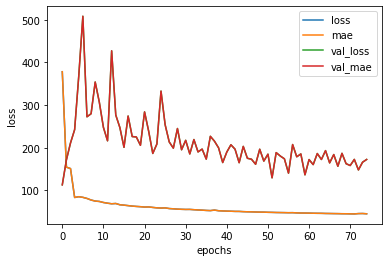

In [ ]:
# model 8
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import os

HORIZON = 1
WINDOW_SIZE = 100

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output.csv",
    names=["Time", "Open"])

X_btc = btc_data[["Time"]]
y_btc = btc_data["Open"]

timesteps = btc_data.index.to_numpy()
prices = btc_data["Open"].to_numpy()

split_size = int(0.8 * len(prices))
# Create train data splits (everything before the split)
X_train_a, y_train_a = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test_a, y_test_a = timesteps[split_size:], prices[split_size:]

def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, 
                                            save_best_only=True)

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

btc_model_8 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_8")

btc_model_8.compile(loss = "mae",
                    optimizer = tf.optimizers.Adam(),
                    metrics=["mae"])

history = btc_model_8.fit(x=X_train, y=y_train, 
                          batch_size=12288, 
                          validation_data=(X_test, y_test),
                          epochs=100, 
                          callbacks=[early_stopping, create_model_checkpoint(model_name=btc_model_8.name)])

btc_model_8.evaluate(X_test, y_test, batch_size=8192)

y_pred = btc_model_8.predict(X_test)

btc_model_8.save("btc_model_8")
btc_model_8.save("btc_model_8.h5")

offset=0
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_1_preds")

# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

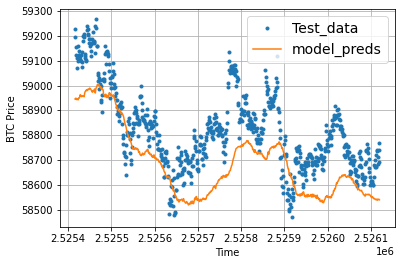

In [ ]:
offset=504500
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_preds")

Epoch 1/100
165/165 [==============================] - 8s 34ms/step - loss: 284.8786 - mae: 284.8786 - val_loss: 338.5788 - val_mae: 338.5788
Epoch 2/100
165/165 [==============================] - 3s 20ms/step - loss: 124.1789 - mae: 124.1789 - val_loss: 498.2217 - val_mae: 498.2217
Epoch 3/100
165/165 [==============================] - 4s 22ms/step - loss: 114.3583 - mae: 114.3583 - val_loss: 449.5172 - val_mae: 449.5172
Epoch 4/100
165/165 [==============================] - 3s 21ms/step - loss: 106.5589 - mae: 106.5589 - val_loss: 379.9628 - val_mae: 379.9628
Epoch 5/100
165/165 [==============================] - 5s 30ms/step - loss: 102.1463 - mae: 102.1463 - val_loss: 316.3503 - val_mae: 316.3503
Epoch 6/100
165/165 [==============================] - 3s 20ms/step - loss: 102.2409 - mae: 102.2409 - val_loss: 428.0744 - val_mae: 428.0744
Epoch 7/100
165/165 [==============================] - 3s 21ms/step - loss: 96.1805 - mae: 96.1805 - val_loss: 382.8811 - val_mae: 382.8811
Epoch 8/

Text(0.5, 0, 'epochs')

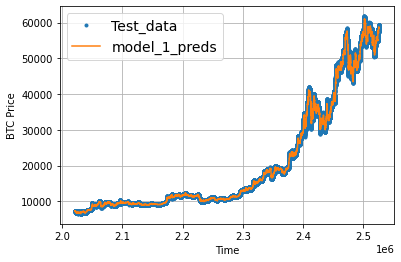

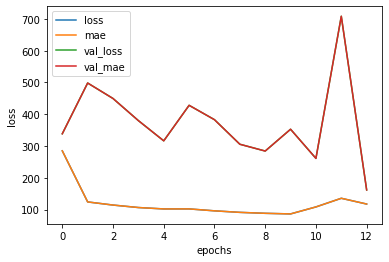

In [ ]:
# model 9
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import os

HORIZON = 1
WINDOW_SIZE = 275

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output.csv",
    names=["Time", "Open"])

X_btc = btc_data[["Time"]]
y_btc = btc_data["Open"]

timesteps = btc_data.index.to_numpy()
prices = btc_data["Open"].to_numpy()

split_size = int(0.8 * len(prices))
# Create train data splits (everything before the split)
X_train_a, y_train_a = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test_a, y_test_a = timesteps[split_size:], prices[split_size:]

def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, 
                                            save_best_only=True)

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

btc_model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_9")

btc_model_9.compile(loss = "mae",
                    optimizer = tf.optimizers.Adam(),
                    metrics=["mae"])

history = btc_model_9.fit(x=X_train, y=y_train, 
                          batch_size=12288, 
                          validation_data=(X_test, y_test),
                          epochs=100, 
                          callbacks=[early_stopping, create_model_checkpoint(model_name=btc_model_9.name)])

btc_model_9.evaluate(X_test, y_test, batch_size=8192)

y_pred = btc_model_9.predict(X_test)

btc_model_9.save("btc_model_9")
btc_model_9.save("btc_model_9.h5")

offset=0
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_1_preds")

# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

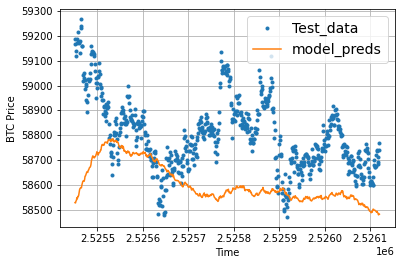

In [ ]:
offset=504500
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_preds")

Epoch 1/100
165/165 [==============================] - 6s 27ms/step - loss: 334.4476 - mae: 334.4476 - val_loss: 417.9549 - val_mae: 417.9549
Epoch 2/100
165/165 [==============================] - 4s 24ms/step - loss: 90.4174 - mae: 90.4174 - val_loss: 398.6612 - val_mae: 398.6612
Epoch 3/100
165/165 [==============================] - 4s 23ms/step - loss: 85.4903 - mae: 85.4903 - val_loss: 268.5165 - val_mae: 268.5165
Epoch 4/100
165/165 [==============================] - 4s 23ms/step - loss: 80.8639 - mae: 80.8639 - val_loss: 238.0478 - val_mae: 238.0478
Epoch 5/100
165/165 [==============================] - 3s 16ms/step - loss: 81.3975 - mae: 81.3975 - val_loss: 339.5997 - val_mae: 339.5997
Epoch 6/100
165/165 [==============================] - 2s 15ms/step - loss: 78.3487 - mae: 78.3487 - val_loss: 341.2058 - val_mae: 341.2058
Epoch 7/100
165/165 [==============================] - 2s 15ms/step - loss: 74.4781 - mae: 74.4781 - val_loss: 267.9844 - val_mae: 267.9844
Epoch 8/100
165/16

Text(0.5, 0, 'epochs')

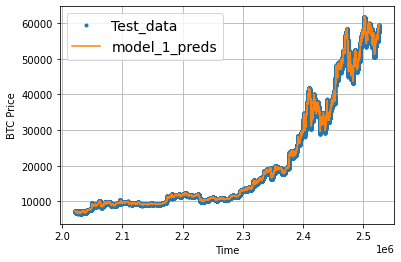

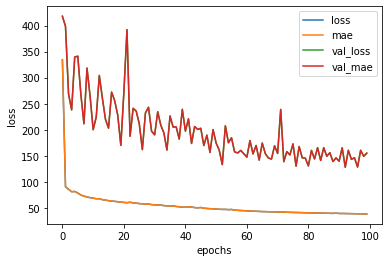

In [ ]:
# model 10
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import os

HORIZON = 1
WINDOW_SIZE = 65

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output.csv",
    names=["Time", "Open"])

X_btc = btc_data[["Time"]]
y_btc = btc_data["Open"]

timesteps = btc_data.index.to_numpy()
prices = btc_data["Open"].to_numpy()

split_size = int(0.8 * len(prices))
# Create train data splits (everything before the split)
X_train_a, y_train_a = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test_a, y_test_a = timesteps[split_size:], prices[split_size:]

def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, 
                                            save_best_only=True)

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

btc_model_10 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_10")

btc_model_10.compile(loss = "mae",
                    optimizer = tf.optimizers.Adam(),
                    metrics=["mae"])

history = btc_model_10.fit(x=X_train, y=y_train, 
                          batch_size=12288, 
                          validation_data=(X_test, y_test),
                          epochs=100, 
                          callbacks=[early_stopping, create_model_checkpoint(model_name=btc_model_10.name)])

btc_model_10.evaluate(X_test, y_test, batch_size=8192)

y_pred = btc_model_10.predict(X_test)

btc_model_10.save("btc_model_10")
btc_model_10.save("btc_model_10.h5")

offset=0
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_1_preds")

# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

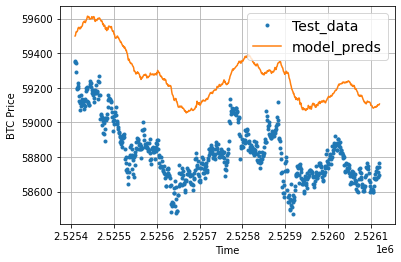

In [ ]:
offset=504500
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_preds")

Epoch 1/100
165/165 [==============================] - 30s 178ms/step - loss: 3285.5574 - mae: 3285.5574 - val_loss: 715.3531 - val_mae: 715.3531
Epoch 2/100
165/165 [==============================] - 27s 165ms/step - loss: 22.0208 - mae: 22.0208 - val_loss: 52.2982 - val_mae: 52.2982
Epoch 3/100
165/165 [==============================] - 28s 167ms/step - loss: 12.9625 - mae: 12.9625 - val_loss: 48.2563 - val_mae: 48.2563
Epoch 4/100
165/165 [==============================] - 27s 166ms/step - loss: 12.2810 - mae: 12.2810 - val_loss: 47.1264 - val_mae: 47.1264
Epoch 5/100
165/165 [==============================] - 28s 168ms/step - loss: 11.9879 - mae: 11.9879 - val_loss: 45.8701 - val_mae: 45.8701
Epoch 6/100
165/165 [==============================] - 27s 166ms/step - loss: 11.5069 - mae: 11.5069 - val_loss: 43.6262 - val_mae: 43.6262
Epoch 7/100
165/165 [==============================] - 27s 166ms/step - loss: 11.0702 - mae: 11.0702 - val_loss: 42.4888 - val_mae: 42.4888
Epoch 8/100
16

Text(0.5, 0, 'epochs')

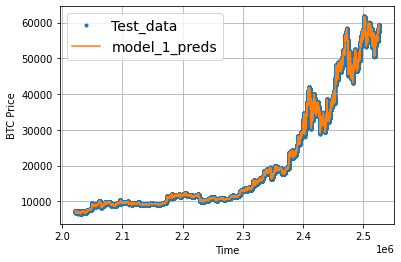

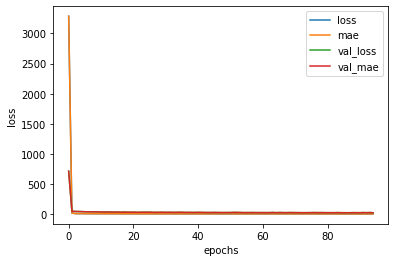

In [ ]:
# model 11
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import os

HORIZON = 1
WINDOW_SIZE = 30

np.set_printoptions(precision=3, suppress=True)
btc_data = pd.read_csv(
    "/content/drive/MyDrive/Science Fair/output.csv",
    names=["Time", "Open"])

X_btc = btc_data[["Time"]]
y_btc = btc_data["Open"]

timesteps = btc_data.index.to_numpy()
prices = btc_data["Open"].to_numpy()

split_size = int(0.8 * len(prices))
# Create train data splits (everything before the split)
X_train_a, y_train_a = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test_a, y_test_a = timesteps[split_size:], prices[split_size:]

def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, 
                                            save_best_only=True)

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

btc_model_11 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_11")

btc_model_11.compile(loss = "mae",
                    optimizer = tf.optimizers.Adam(learning_rate=0.00002),
                    metrics=["mae"])

history = btc_model_11.fit(x=X_train, y=y_train, 
                          batch_size=12288, 
                          validation_data=(X_test, y_test),
                          epochs=100, 
                          callbacks=[early_stopping, create_model_checkpoint(model_name=btc_model_11.name)])

btc_model_11.evaluate(X_test, y_test, batch_size=8192)

y_pred = btc_model_11.predict(X_test)

btc_model_11.save("btc_model_11")
btc_model_11.save("btc_model_11.h5")

offset=0
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_1_preds")

# plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

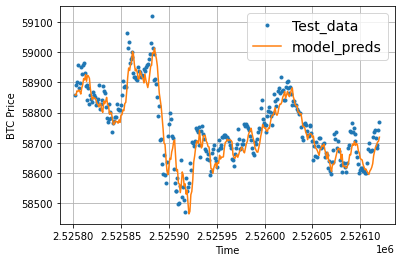

In [ ]:
offset=504900
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_test[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test_a[-len(X_test):], values=y_pred, start=offset, format="-", label="model_preds")